In [1]:
import pandas as pd 
import numpy as np

# Build a recommender system by using cosine simillarties score.

In [2]:
df = pd.read_csv(r"C:\Users\shiva\Downloads\book (1).csv",encoding='latin-1')
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [4]:
df.groupby('Book.Title')['Book.Rating'].mean().sort_values(ascending = False).head()

Book.Title
Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)                                                           10.0
The Piano Man's Daughter                                                                                              10.0
Private Screening                                                                                                     10.0
The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines    10.0
Desert Solitaire                                                                                                      10.0
Name: Book.Rating, dtype: float64

In [5]:
df.groupby('Book.Title')['Book.Rating'].count().sort_values(ascending = False).head()

Book.Title
Fahrenheit 451                                   5
Ender's Game (Ender Wiggins Saga (Paperback))    4
Stardust                                         4
Vanished                                         4
Charlie and the Chocolate Factory                4
Name: Book.Rating, dtype: int64

<Axes: >

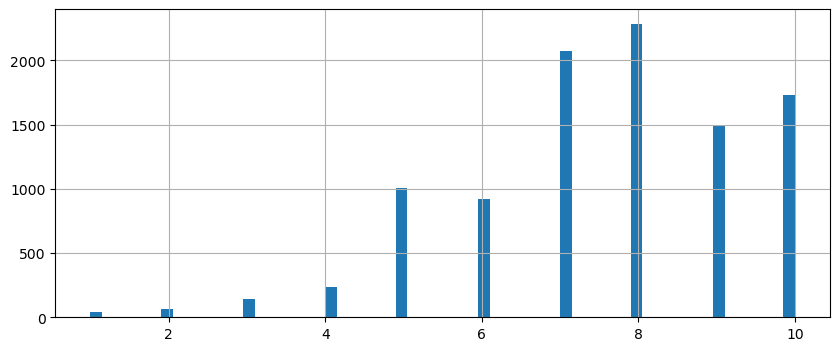

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))
df['Book.Rating'].hist(bins = 60)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Book.Title'].values.astype('U'))
tfidf_matrix

<10000x11435 sparse matrix of type '<class 'numpy.float64'>'
	with 38044 stored elements in Compressed Sparse Row format>

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(tfidf_matrix)

In [9]:
def get_recommendations(book_title, cosine_sim, df):
    book_index = df[df['Book.Title'] == book_title].index[0]
    sim_scores = list(enumerate(cos_sim[book_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    book_indices = [x[0] for x in sim_scores[1:6]]
    return df['Book.Title'].iloc[book_indices]

In [10]:
book_title = "Unnatural Exposure"
recommendations = get_recommendations(book_title, cos_sim, df)
print(f"Recommendations for '{book_title}':")
print(recommendations)

Recommendations for 'Unnatural Exposure':
8852                                 Unnatural Selections
4320            The Darwin Awards II: Unnatural Selection
5744    His Only Desire (Double Exposure) (Intrigue, 627)
2495    Northern Exposure: The Official Publication of...
2494    The Northern Exposure Cookbook: A Community Co...
Name: Book.Title, dtype: object
